In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter

In [167]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud = pd.read_csv('stud_math.csv')
print(stud.sample(5))

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
288     GP   M   18       U     GT3       T   2.0   1.0  services  services   
232     GP   M   17       U     GT3       T   4.0   NaN   teacher   teacher   
386     MS   F   18       R     GT3       T   4.0   4.0   teacher   at_home   
144     GP   M   17       U     GT3       T   2.0   1.0     other     other   
382     MS   M   17       U     GT3       T   2.0   3.0     other  services   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
288  reputation   mother         1.0        3.0       0.0        no     no   
232  reputation   mother         1.0        2.0       0.0       yes    NaN   
386  reputation   mother         3.0        1.0       0.0        no    yes   
144        home      NaN         1.0        1.0       3.0        no    yes   
382         NaN   father         2.0        2.0       0.0        no     no   

    paid activities nursery  studytime, granular higher 

In [168]:
print(stud.shape)
print(stud.isna().sum())
print(stud.info())

(395, 30)
school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  

In [169]:
# столбцы с количественными характеристиками
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular',
        'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
# столбцы с номинативными характеристиками
colsn = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
         'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [170]:
#для замены модой 
def fill_modeval(column):
    column.fillna(column.mode()[0],  inplace=True)

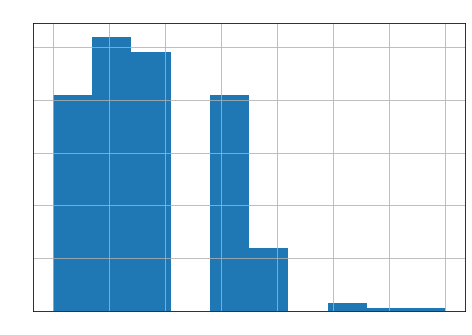

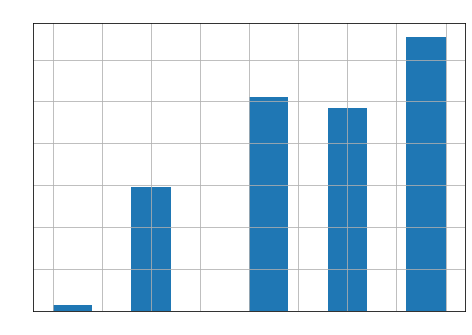

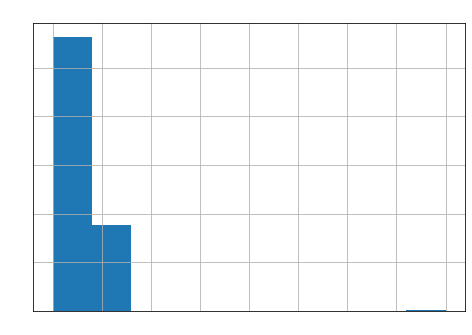

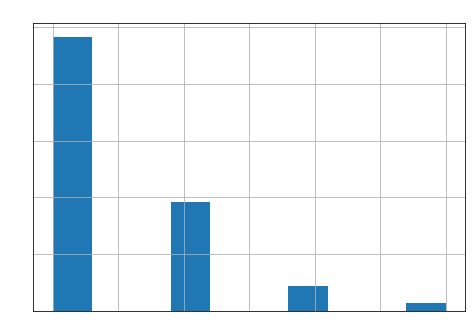

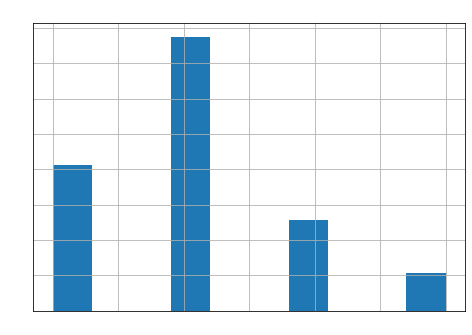

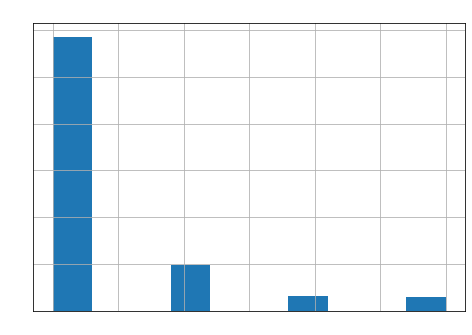

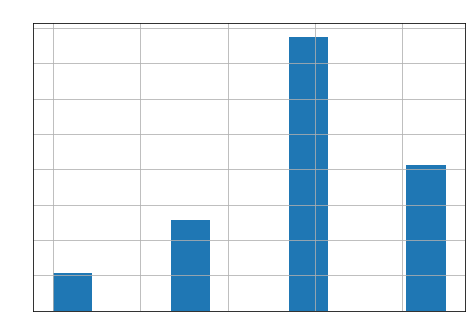

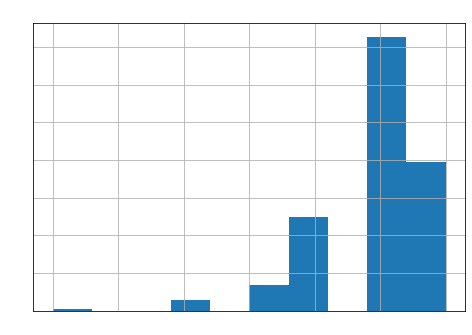

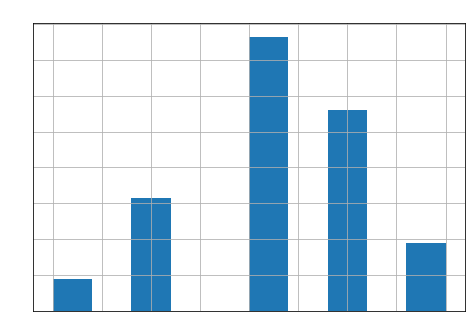

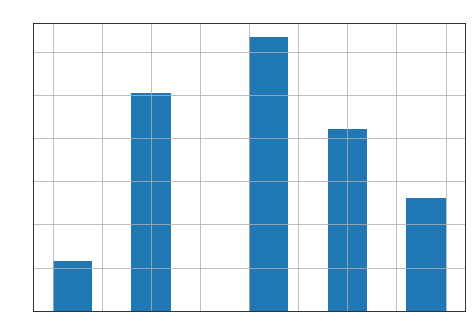

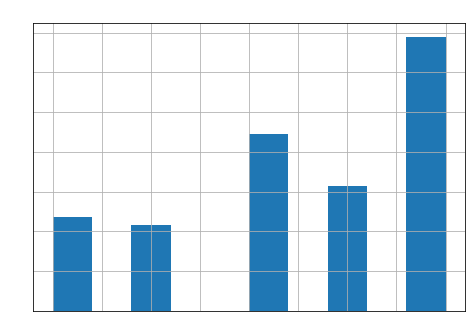

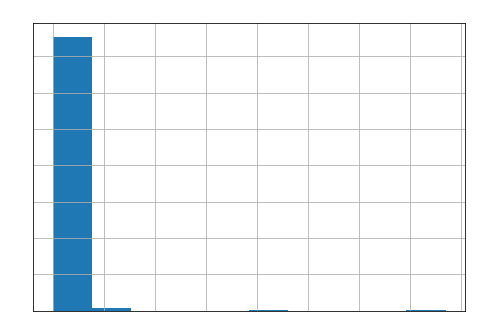

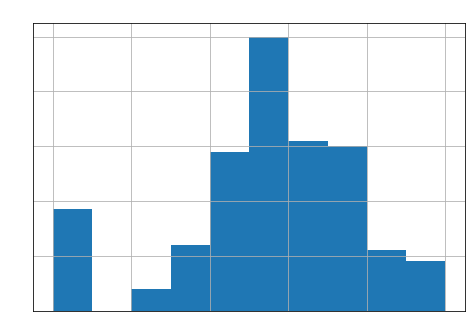

In [171]:
# начнем рассматривать данные подробнее
# сначала количественные характеристики

for col in cols:
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    fg_color = 'white'
    stud[col].hist()
    # set tick and ticklabel color цифры на осях
    axes.tick_params(color=fg_color, labelcolor=fg_color)
    plt.title(col, color='w')
    plt.show()

## посмотрев графики - видим какие-то странности в 'famrel', 'Fedu', 'absences'

In [172]:
# в столбце famrel затесалось значение '-1', скорее всего это опечатка(имелось ввиду '1'), 
#найдем и заменим его
display(pd.DataFrame(stud.famrel.value_counts()))
df2 = stud[(stud['famrel']== -1)]
display(df2)
stud.loc[((stud['famrel'] == -1)), 'famrel'] = 1
display(pd.DataFrame(stud.famrel.value_counts()))

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


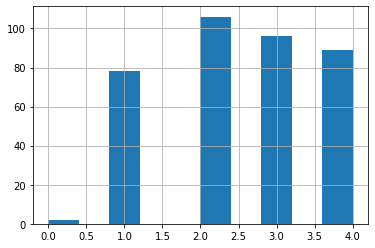

In [173]:
# далее рассмотрим более подробно столбец Fedu, который должен содержать значения от 0 до 4
display(pd.DataFrame(stud.Fedu.value_counts()))
# видим значение 40, что скорее всего тоже опечатка (имелось ввиду "4"). Исправим это
stud.loc[((stud['Fedu'] == 40)), 'Fedu'] = 4
display(pd.DataFrame(stud.Fedu.value_counts()))
# посмотрим на распределение теперь
stud.Fedu.hist()

In [174]:
# далее рассмотрим более подробно столбец absences
display(pd.DataFrame(stud.absences.value_counts(ascending=False)))
stud.absences.describe()
#здесь есть явные выбросы

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

4.0 8.0 -8.0 16.0


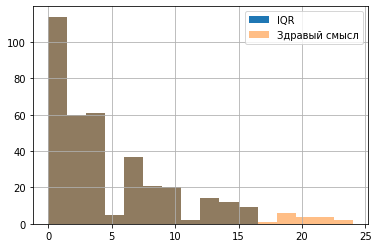

In [175]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
print(median, IQR, median - 1.5*IQR, median + 1.5*IQR)
stud.absences.loc[stud.absences.between(
    median - 1.5*IQR, median + 1.5*IQR)].hist(bins=16, range=(0, 24), label='IQR')
stud.absences.loc[stud.absences <= 24].hist(
    alpha=0.5, bins=16, range=(0, 24), label='Здравый смысл')
plt.legend()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
24.0,12
3.0,8


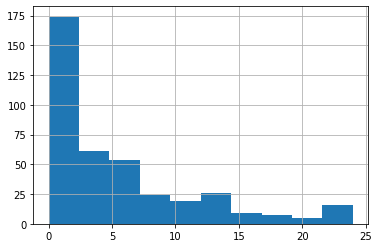

In [178]:
#руководствуясь "здравым смыслом" предлагаю все что больше 25 - заменить на допустим 24
stud.loc[(stud['absences'] >= 25), 'absences'] = 24
display(pd.DataFrame(stud.absences.value_counts()))
#а пропуски заменим средним
stud['absences'].fillna(int(stud.absences.mean()), inplace = True)

# посмотрим на распределение теперь
stud.absences.hist()

In [179]:
#посмотрим на корреляцию
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.067415,0.029023,0.135107,-0.065946,0.186192,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014459,0.025335,0.064164,-0.045051,0.098575,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.026122,-0.025892,0.042663,0.023862,0.035542,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021542,-0.021937,0.037636,-0.021531,-0.030007,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.039555,-0.121969,-0.051280,-0.080016,-0.084367,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009110,0.098382,0.120914,0.081284,0.111375,-0.344338
"studytime, granular",0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.039555,0.121969,0.051280,0.080016,0.084367,-0.115741
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,-0.039555,1.000000,0.172751,0.077167,0.086309,-0.085842,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.172751,1.000000,0.296437,0.061575,-0.005362,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.077167,0.296437,1.000000,-0.015608,0.078224,-0.129685


## видим полностью скореллированные относительно друг друга столбцы "studytime" и "studytime, granular". Один из них можно будет смело убирать, в дальнейшем оставим столбец "studytime" с положительной корреляцией и известным содержанием.
## да и столбец "freetime" очень слабо скоррелирован
## посмотрим на пропуски данных в столбцах с которыми предположительно будем в дальнейшем работать

In [180]:
#если в столбце "reason" есть значение "home", а в столбце "traveltime" нет данных, логично 
#будет заменить пропущенные данные значение "1"
#посмотрим
dfT = stud[(stud['reason']=='home') & (stud['traveltime'].isnull())]
display(dfT)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
234,GP,M,16,U,LE3,NaN,1.0,1.0,other,other,home,mother,NaN,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,no,3.0,4.0,2.0,5.0,18.0,30.0
310,GP,F,19,U,LE3,T,1.0,NaN,services,services,home,other,NaN,2.0,1.0,no,no,no,yes,no,-6.0,yes,no,yes,4.0,2.0,4.0,3.0,0.0,0.0
372,MS,F,17,NaN,GT3,T,2.0,2.0,other,at_home,home,mother,NaN,3.0,0.0,no,no,no,yes,yes,-9.0,yes,no,NaN,3.0,4.0,3.0,3.0,8.0,55.0
384,MS,M,18,R,GT3,T,4.0,2.0,other,NaN,home,father,NaN,1.0,1.0,no,no,NaN,no,yes,-3.0,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0


In [181]:
#заменим
stud.loc[((stud['traveltime'].isnull()) & (stud['reason'] == 'home')), 'traveltime'] = 1
display(pd.DataFrame(stud.traveltime.value_counts()))

,traveltime
1.0,248
2.0,96
3.0,22
4.0,7


In [182]:
#также логично, было бы, заменить отсутствующие данные в "traveltime", если 'address'-городской
stud.loc[(((stud['address']=='U') & (stud['traveltime'].isnull()))), 'traveltime'] = 1
display(pd.DataFrame(stud.traveltime.value_counts()))

,traveltime
1.0,262
2.0,96
3.0,22
4.0,7


In [183]:
#посмотрим еще раз на незаполненные данные
print(stud.isna().sum())

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime              8
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences                0
score                   6
dtype: int64


In [185]:
#колонки 'health', 'famrel', 'failures' и 'studytime'
print(stud.health.mode())
print(stud.health.mean())
print(stud.famrel.mode())
print(stud.famrel.mean())
print(stud.failures.mode())
print(stud.failures.mean())
print(stud.studytime.mode())
print(stud.studytime.mean())
print(stud.studytime.mode())
print(stud.studytime.mean())
print(stud.goout.mode())
print(stud.goout.mean())

#в столбцах 'famrel', 'goout','failures' и 'studytime' пропуски заменим модой
fill_modeval(stud['failures'])
fill_modeval(stud['goout'])
fill_modeval(stud['famrel'])
fill_modeval(stud['studytime'])

#а в столбце 'health' средним
stud['health'].fillna(int(stud.health.mean()), inplace = True)

print(stud.isna().sum())

0    5.0
dtype: float64
3.531578947368421
0    4.0
dtype: float64
3.946835443037975
0    0.0
dtype: float64
0.3189873417721519
0    2.0
dtype: float64
2.037974683544304
0    2.0
dtype: float64
2.037974683544304
0    3.0
dtype: float64
3.1037974683544305
school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime              8
studytime               0
failures                0
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                  0
freetime               11
goout                   0
health                  0
absences          

In [186]:
# если 'Fjob' работает 'teacher' или 'health' или 'services', то образование у него должно 
#быть как минимум "3"
stud.loc[(((stud['Fjob'] == 'teacher') | (stud['Fjob'] == 'health') | (
    stud['Fjob'] == 'services')) & (stud['Fedu'].isnull())), 'Fedu'] = 3
print(stud.isna().sum())

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   11
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime              8
studytime               0
failures                0
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                  0
freetime               11
goout                   0
health                  0
absences                0
score                   6
dtype: int64


In [187]:
#перейдем к номинативным признакам
#если размер семьи больше 3-х, скорее всего родители живут вместе 
display(pd.DataFrame(stud.Pstatus.value_counts()))
stud.loc[((stud['Pstatus'].isnull()) & (stud['famsize'] == 'GT3')), 'Pstatus'] = 'T'
display(pd.DataFrame(stud.Pstatus.value_counts()))

,Pstatus
T,314
A,36


,Pstatus
T,342
A,36


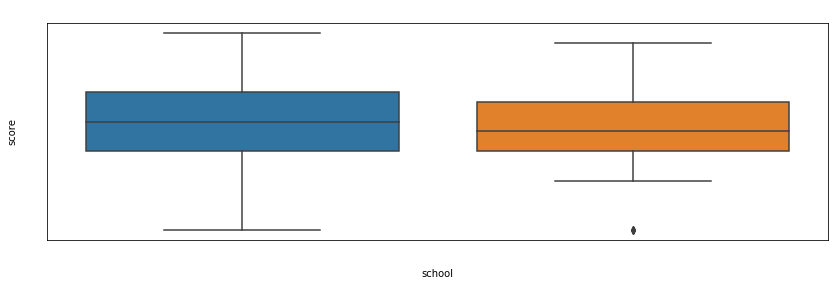

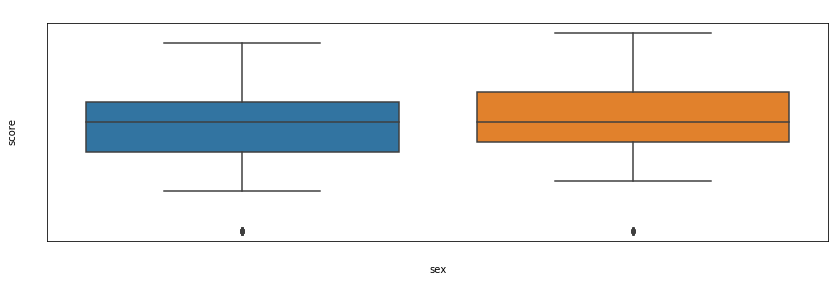

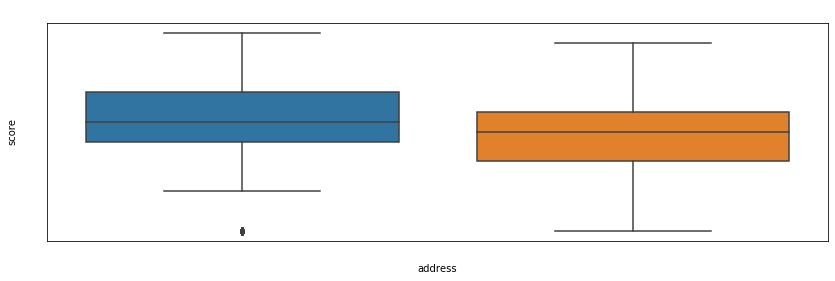

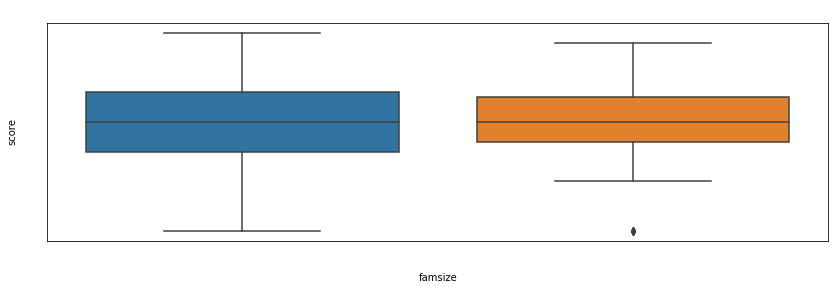

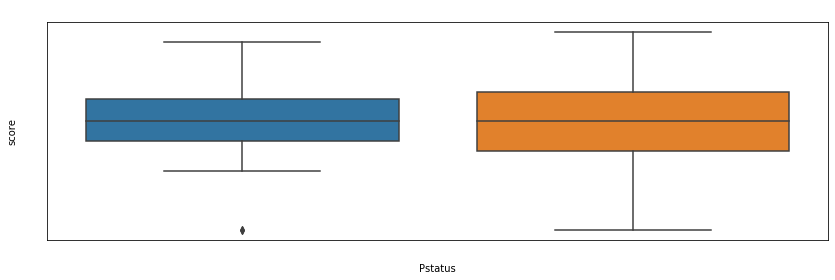

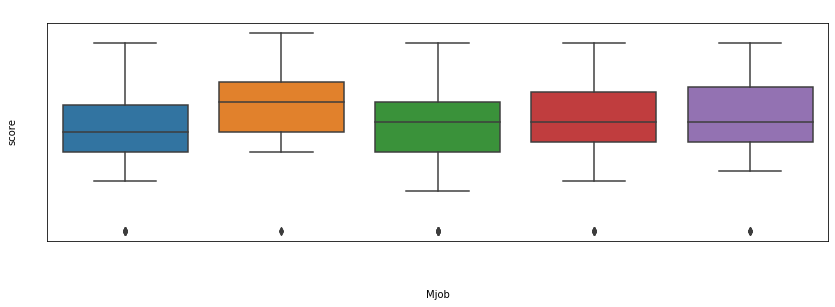

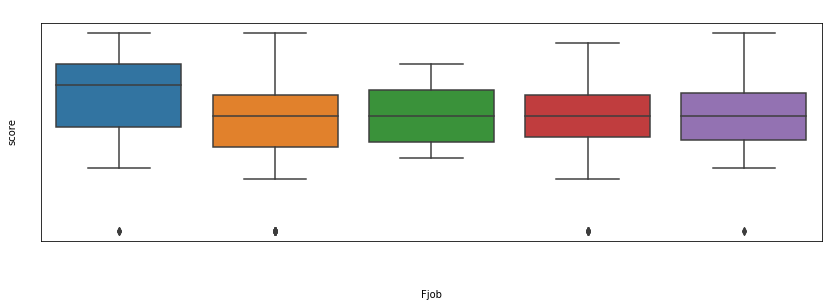

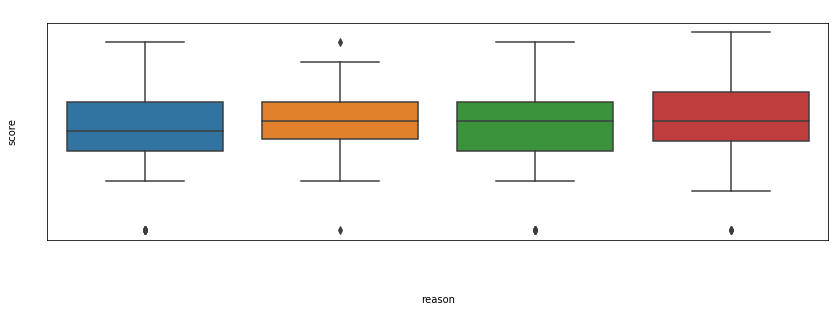

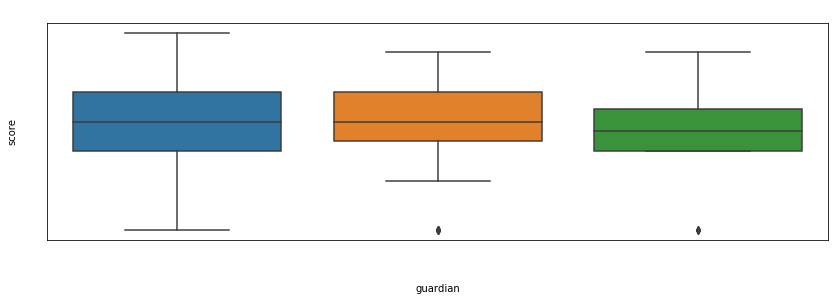

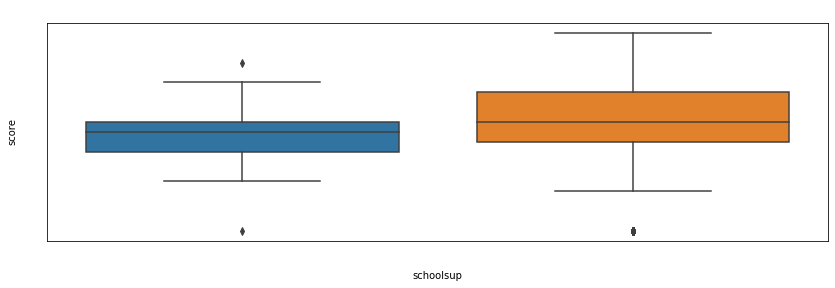

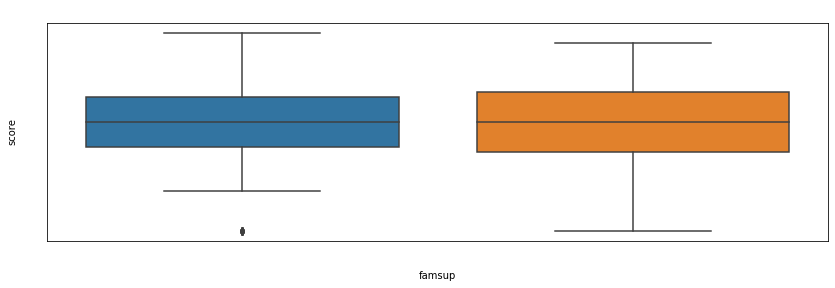

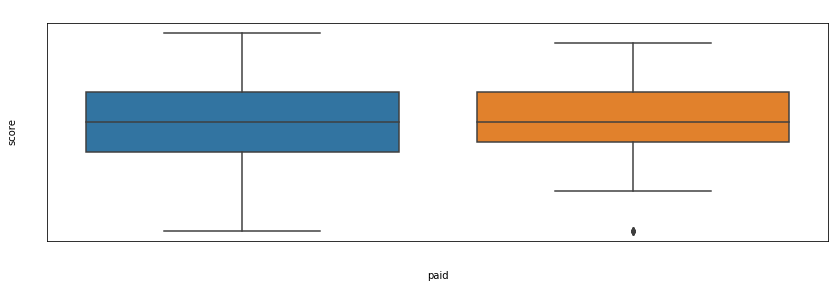

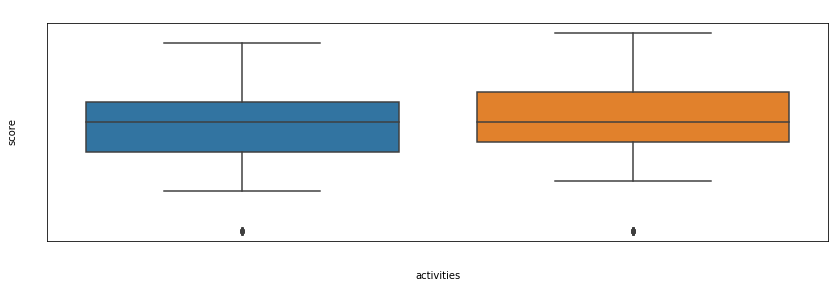

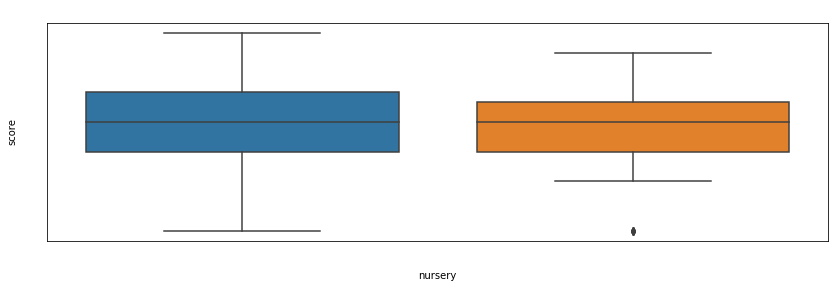

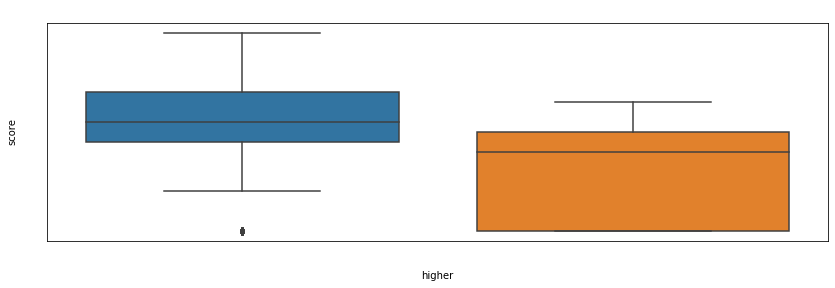

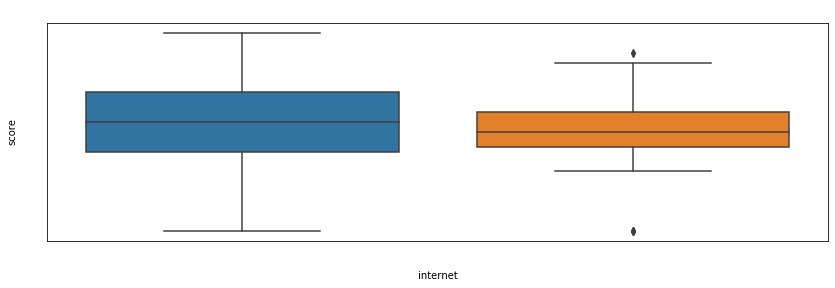

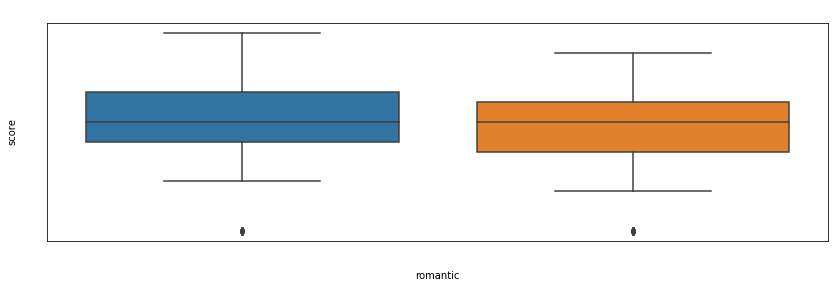

In [188]:
# пострим box-plot'ы
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column, color='w')
    fg_color = 'white'
    ax.tick_params(color=fg_color, labelcolor=fg_color)
    plt.show()


for col in colsn:
    get_boxplot(col)

In [189]:
#по графикам я бы сказала выделяются Mjob и higher, посмотрим на статистику
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in colsn:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


## из номинативных оставляем колонки Mjob и higher
## посмотрим на пропуски в этих колонках

In [190]:
dfMJ = stud[stud['Mjob'].isnull()]
display(dfMJ)
display(pd.DataFrame(dfMJ.Medu.value_counts()))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,0.0,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,3.0,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,3.0,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,NaN,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


,Medu
4.0,7
3.0,6
2.0,4
1.0,2


In [191]:
#заполним 'Mjob' значением 'at_home', если образование до 9-го класса
stud.loc[(((stud['Medu'] == 1) | (stud['Medu'] == 2)) & (stud['Mjob'].isnull())), 'Mjob'] = 'at_home'
print(stud.isna().sum())

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                17
Medu                    3
Fedu                   11
Mjob                   13
Fjob                   36
reason                 17
guardian               31
traveltime              8
studytime               0
failures                0
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                  0
freetime               11
goout                   0
health                  0
absences                0
score                   6
dtype: int64


In [192]:
#колонку 'higher' заполним модой
fill_modeval(stud['higher'])

print(stud.isna().sum())

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                17
Medu                    3
Fedu                   11
Mjob                   13
Fjob                   36
reason                 17
guardian               31
traveltime              8
studytime               0
failures                0
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                  0
internet               34
romantic               31
famrel                  0
freetime               11
goout                   0
health                  0
absences                0
score                   6
dtype: int64


In [193]:
# Удаляем столбцы, в которых нет ценной для нас информации
stud.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Fjob',
           'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
           'nursery', 'studytime, granular', 'internet', 'romantic', 'freetime'], axis=1, inplace=True)
print(stud.shape)
print(stud.isna().sum())
print(stud.info())

(395, 13)
age            0
Medu           3
Fedu          11
Mjob          13
traveltime     8
studytime      0
failures       0
higher         0
famrel         0
goout          0
health         0
absences       0
score          6
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         395 non-null    int64  
 1   Medu        392 non-null    float64
 2   Fedu        384 non-null    float64
 3   Mjob        382 non-null    object 
 4   traveltime  387 non-null    float64
 5   studytime   395 non-null    float64
 6   failures    395 non-null    float64
 7   higher      395 non-null    object 
 8   famrel      395 non-null    float64
 9   goout       395 non-null    float64
 10  health      395 non-null    float64
 11  absences    395 non-null    float64
 12  score       389 non-null    float64
dtypes: float64(10), int64(1), objec

In [194]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,score
age,1.000000,-0.161704,-0.164423,0.085036,-0.015355,0.228081,0.065250,0.134069,-0.066109,0.186192,-0.155726
Medu,-0.161704,1.000000,0.615489,-0.162342,0.077994,-0.245587,-0.014009,0.063672,-0.036499,0.098575,0.213349
Fedu,-0.164423,0.615489,1.000000,-0.143101,0.016140,-0.267263,-0.026993,0.043132,0.035411,0.034866,0.127846
traveltime,0.085036,-0.162342,-0.143101,1.000000,-0.094544,0.056590,-0.018600,0.052476,-0.037010,-0.023181,-0.062469
studytime,-0.015355,0.077994,0.016140,-0.094544,1.000000,-0.166598,0.037638,-0.051090,-0.081227,-0.084146,0.114295
failures,0.228081,-0.245587,-0.267263,0.056590,-0.166598,1.000000,-0.017230,0.113649,0.077800,0.103567,-0.337187
famrel,0.065250,-0.014009,-0.026993,-0.018600,0.037638,-0.017230,1.000000,0.074217,0.079967,-0.081774,0.052902
goout,0.134069,0.063672,0.043132,0.052476,-0.051090,0.113649,0.074217,1.000000,-0.015007,0.077908,-0.127742
health,-0.066109,-0.036499,0.035411,-0.037010,-0.081227,0.077800,0.079967,-0.015007,1.000000,-0.037722,-0.064279
absences,0.186192,0.098575,0.034866,-0.023181,-0.084146,0.103567,-0.081774,0.077908,-0.037722,1.000000,0.064921


## В итоге мы оставили для дальнейшей работы 13 характеристик, две из которых номинативные. Из количественных под вопросом имеем 4-ре слабоскоррелированных колонки (traveltime, famrel, health, absences), впоследствии их можно будет тоже удалить, зависит от дальнейшей задачи. Осталось совсем не много пропусков, как с ними работать тоже зависит от того что мы будем делать дальше.
## Пока мы видим следующие закономерности:
## Чем выше образование у отца и матери и чем больше свободного времени на учебу помимо школы тем выше балы
## Чем больше возраст, количество внеучебных неудач и времени проведенным с друзьями, тем баллы ниже.